# Basic Statistics and Analytics of Data Professionals Salaries - template for Assignment 1
- Summarizing data.
- Plotting data.
- Confidence intervals.
- Statistical hypothesis testing.
- Bootstrapping to visualize Central Limit tehorem and statistical hypothesis testing.

#### About this dataset
Data from "2021 Kaggle Machine Learning & Data Science Survey" https://www.kaggle.com/kaggle-survey-2021. For now, it is the most comprehensive dataset available on the state of ML and Data Science.

#### Major question
Does it make sense to get a graduate degree in Data Analytics and AI?

#### Add your code to this notebook


### Importing Needed packages
Statsmodels is a Python module that allows users to explore data, estimate statistical models, and perform statistical tests.

In [100]:
## Install a missing module, if necessary
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
try:
    import statsmodels.api as sm
except:
    !pip install statsmodels
    import statsmodels.api as sm
import numpy as np
from scipy import stats
%matplotlib inline


## Understanding the Data

We have downloaded "2021 Kaggle ML & DS Survey" files from https://www.kaggle.com/kaggle-survey-2021.

### `kaggle_survey_2021_responses.csv`:
File **`kaggle_survey_2021_responses.csv`** contains 42+ questions and 25,973 responses.

### `kaggle_survey_2021_answer_choices.pdf`:
File **`kaggle_survey_2021_answer_choices.pdf`** contains list of answer choices for every question.

### `kaggle_survey_2021_methodology.pdf`:
File **`kaggle_survey_2021_methodology.pdf`** describes of how the survey was conducted.

In [101]:
url = "kaggle_survey_2021_responses.csv"

In [102]:
df_schema = pd.read_csv(url, header=[0,1], nrows=2)
df_schema.columns = df_schema.columns.map(' - '.join)
print(df_schema.columns[1:])

Index(['Q1 - What is your age (# years)?',
       'Q2 - What is your gender? - Selected Choice',
       'Q3 - In which country do you currently reside?',
       'Q4 - What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       'Q5 - Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
       'Q6 - For how many years have you been writing code and/or programming?',
       'Q7_Part_1 - What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python',
       'Q7_Part_2 - What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R',
       'Q7_Part_3 - What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL',
       'Q7_Part_4 - What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C',
       .

In [103]:
print('Survey questions of insterest:')

subC = 'country do you currently reside'
colC = [s for s in df_schema.columns if subC in s][0]
print(colC)
qC = colC[:3].strip()

subE = 'highest level of formal education'
colE = [s for s in df_schema.columns if subE in s][0]
print(colE)
qE = colE[:3].strip()

subS = 'yearly compensation'
colS = [s for s in df_schema.columns if subS in s][0]
print(colS)
qS = colS[:3].strip()

Survey questions of insterest:
Q3 - In which country do you currently reside?
Q4 - What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Q25 - What is your current yearly compensation (approximate $USD)?


## Reading the data in

In [104]:
df = pd.read_csv(url,skiprows=[1],low_memory=False)

# display first 5 rows of the dataset
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df.shape

(25973, 369)

In [106]:
df.describe()

,Time from Start to Finish (seconds),Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER
count,2.597300e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.105466e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.014716e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.200000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.430000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.560000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.038000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2.488653e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Country selection

Select countries.

In [107]:
geography = 'North America'
#geography = 'Eastern Europe'

In [108]:
if geography == 'Eastern Europe':
    countries_to_keep = ['Belarus', 'Czech Republic', 'Poland', 'Romania', 'Russia', 'Ukraine']
elif geography == 'North America':
    countries_to_keep = ['Canada', 'United States of America']

### Data Exploration

Explore data in three columns - (country you currently reside in), (highest level of formal education) and (approximate current yearly compensation in $USD).

In [109]:
# Countries
print(set(df[qC].unique()))

{'Australia', 'Turkey', 'Austria', 'Portugal', 'India', 'United States of America', 'Belgium', 'Indonesia', 'Argentina', 'Greece', 'Poland', 'South Africa', 'Hong Kong (S.A.R.)', 'Saudi Arabia', 'Japan', 'Egypt', 'Netherlands', 'Thailand', 'Iraq', 'South Korea', 'Ecuador', 'Colombia', 'Morocco', 'Italy', 'Sri Lanka', 'United Arab Emirates', 'Ukraine', 'Algeria', 'Ireland', 'Other', 'Bangladesh', 'Spain', 'Malaysia', 'Pakistan', 'Israel', 'Ethiopia', 'Singapore', 'Kazakhstan', 'Switzerland', 'Tunisia', 'Peru', 'Sweden', 'Chile', 'Nigeria', 'Canada', 'Germany', 'France', 'China', 'Iran, Islamic Republic of...', 'Romania', 'Kenya', 'Nepal', 'Norway', 'Russia', 'Viet Nam', 'Denmark', 'Brazil', 'I do not wish to disclose my location', 'Belarus', 'Philippines', 'United Kingdom of Great Britain and Northern Ireland', 'Taiwan', 'Uganda', 'Ghana', 'Mexico', 'Czech Republic'}


In [110]:
#Education levels
print(set(df[qE].values))

{'Professional doctorate', 'No formal education past high school', 'Some college/university study without earning a bachelor’s degree', 'Bachelor’s degree', 'Master’s degree', 'I prefer not to answer', 'Doctoral degree'}


In [111]:
# Salary levels
print(df[qS].unique())

['25,000-29,999' '60,000-69,999' '$0-999' '30,000-39,999' nan
 '15,000-19,999' '70,000-79,999' '2,000-2,999' '10,000-14,999'
 '5,000-7,499' '20,000-24,999' '1,000-1,999' '100,000-124,999'
 '7,500-9,999' '4,000-4,999' '40,000-49,999' '50,000-59,999' '3,000-3,999'
 '300,000-499,999' '200,000-249,999' '125,000-149,999' '250,000-299,999'
 '80,000-89,999' '90,000-99,999' '150,000-199,999' '>$1,000,000'
 '$500,000-999,999']


### Data Cleaning and Pre-Processiong

Keep only countries that you need for the analysis. Remove rows with missing data. Convert salary buckets into numbers.

In [112]:
viz = df[df[qC].isin(countries_to_keep)][[qE,qS]]
viz.head()

,Q4,Q25
32,Some college/university study without earning ...,NaN
42,Master’s degree,"15,000-19,999"
44,Some college/university study without earning ...,NaN
49,Master’s degree,"100,000-124,999"
51,Bachelor’s degree,"70,000-79,999"


In [113]:
# Summarize the data
viz.describe()

,Q4,Q25
count,2981,2072
unique,7,26
top,Master’s degree,"100,000-124,999"
freq,1365,319


Drop NaNs.

In [114]:
viz = viz.dropna()

In [115]:
viz.describe()

,Q4,Q25
count,2072,2072
unique,7,26
top,Master’s degree,"100,000-124,999"
freq,1012,319


In [116]:
# Number of rows and columns in the data
viz.shape

(2072, 2)

Convert salary buckets into numbers.

In [117]:
viz[qS] = viz[qS].map({'$0-999': 1000, '1,000-1,999': 2000, '2,000-2,999': 3000, '3,000-3,999': 4000, '4,000-4,999': 5000, '5,000-7,499': 7500, '7,500-9,999': 10000, '10,000-14,999': 15000, '15,000-19,999': 20000, '20,000-24,999': 25000, '25,000-29,999': 30000, '30,000-39,999': 40000, '40,000-49,999': 50000, '50,000-59,999': 60000, '60,000-69,999': 70000,  '70,000-79,999': 80000, '80,000-89,999': 90000, '90,000-99,999': 100000, '100,000-124,999': 125000, '125,000-149,999': 150000, '150,000-199,999': 200000, '200,000-249,999': 250000, '250,000-299,999': 300000, '300,000-499,999': 400000, '$500,000-999,999': 500000, '>$1,000,000': 1000000})

In [118]:
viz

,Q4,Q25
42,Master’s degree,20000
49,Master’s degree,125000
51,Bachelor’s degree,80000
76,Master’s degree,400000
80,Professional doctorate,250000
...,...,...
25925,Master’s degree,100000
25929,Doctoral degree,25000
25948,Master’s degree,30000
25949,Master’s degree,100000


### Remove Outliers

Remove outliers, e.g., salaries that you consider too high for the geographical regions. For instance, salary >= $400000 per year may be too high for Eastern Europe (for bachelor's degree and lower).

In [119]:
## Add your code here
if geography == 'Eastern Europe':
    print("Removing outliers for", geography)
    viz = viz[viz[qS] < 400000]
if geography == 'North America':
    viz = viz[viz[qS] < 500000]
    print("Removing outliers for", geography)

Removing outliers for North America


In [120]:
viz.describe()

,Q25
count,2040.000000
mean,120085.294118
std,88365.850977
min,1000.000000
25%,60000.000000
50%,100000.000000
75%,150000.000000
max,400000.000000


### Combine Levels of Education

Include categories 'No formal education past high school' and 'Some college/university study without earning a bachelor’s degree' into 'Bachelor’s degree' category.

In [121]:
viz.loc[viz[qE] == 'No formal education past high school', qE] = 'Bachelor’s degree'
viz.loc[viz[qE] == 'Some college/university study without earning a bachelor’s degree', qE] = 'Bachelor’s degree'

Print number of respondents for each level of education category. For now we drop categories with less that 500 responents from our analysis.

In [122]:
salary_data = viz.groupby(qE)

In [123]:
print(salary_data.count())

                         Q25
Q4                          
Bachelor’s degree        605
Doctoral degree          377
I prefer not to answer    19
Master’s degree         1000
Professional doctorate    39


In [124]:
print(salary_data.mean())

                                  Q25
Q4                                   
Bachelor’s degree        99510.743802
Doctoral degree         146437.665782
I prefer not to answer   77526.315789
Master’s degree         123199.000000
Professional doctorate  125410.256410


In [125]:
print(salary_data.mean()[viz.groupby(qE).count() > 100].dropna())

                             Q25
Q4                              
Bachelor’s degree   99510.743802
Doctoral degree    146437.665782
Master’s degree    123199.000000


Plot distributions.

array([[<Axes: title={'center': 'Q25'}>]], dtype=object)

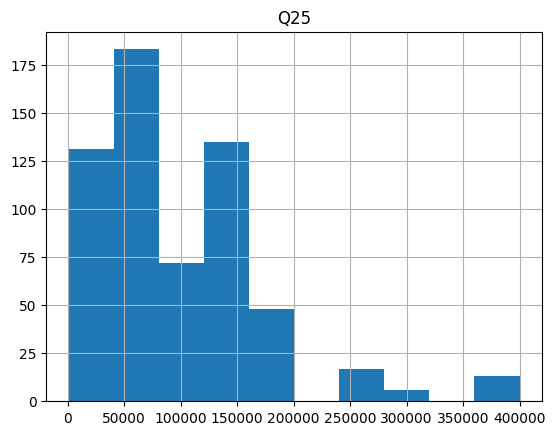

In [126]:
viz[viz[qE]=='Bachelor’s degree'].hist()

array([[<Axes: title={'center': 'Q25'}>]], dtype=object)

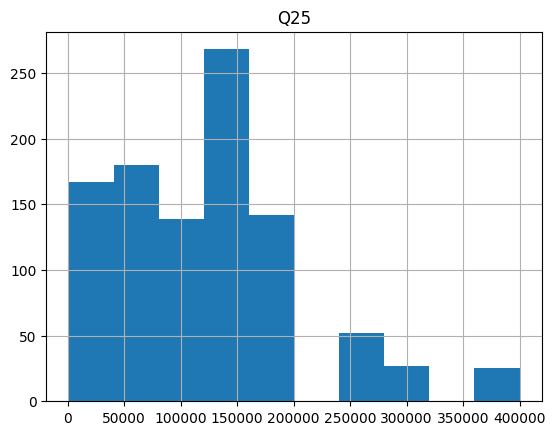

In [127]:
viz[viz[qE]=='Master’s degree'].hist()

array([[<Axes: title={'center': 'Q25'}>]], dtype=object)

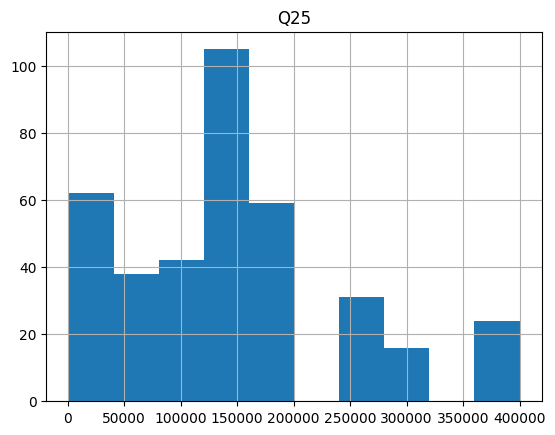

In [128]:
viz[viz[qE]=='Doctoral degree'].hist()

## Statistical Tests

In [129]:
viz[viz[qE]=='Bachelor’s degree'][qS].mean()

99510.74380165289

In [130]:
viz[viz[qE]=='Master’s degree'][qS].mean()

123199.0

In [131]:
viz[viz[qE]=='Doctoral degree'][qS].mean()

146437.66578249336

Perform t-test to compare the mean `salary` in the populations with bachelor's and master's degrees.

In [132]:
b_degree = viz[viz[qE] == 'Bachelor’s degree'][qS]
m_degree = viz[viz[qE] == 'Master’s degree'][qS]
tc_first, pc_first = stats.ttest_ind(b_degree, m_degree)
print("t-test: t = %g, p = %g" % (tc_first, pc_first))

t-test: t = -5.57706, p = 2.8662e-08


Perform t-test to compare the mean `salary` in the populations with master's and doctoral degrees.

In [133]:
m_degree = viz[viz[qE] == 'Master’s degree'][qS]
d_degree = viz[viz[qE] == 'Doctoral degree'][qS]
tc_second, pc_second = stats.ttest_ind(m_degree, d_degree)
print("t-test: t = %g, p = %g" % (tc_second, pc_second))

t-test: t = -4.25023, p = 2.27947e-05


## Bootstrapping

Bootstrap with replacement.

In [134]:
viz[viz[qE]=='Bachelor’s degree'].describe()

,Q25
count,605.000000
mean,99510.743802
std,77362.639221
min,1000.000000
25%,50000.000000
50%,80000.000000
75%,125000.000000
max,400000.000000


In [135]:
bootstrap_samples_b = []
data_b = viz[viz[qE] == 'Bachelor’s degree'][qS]
for i in range(10000):
    bootstrap_sample = np.random.choice(data_b, size=len(data_b), replace=True)
    bootstrap_samples_b.append(np.mean(bootstrap_sample))

In [136]:
bootstrap_samples_m = []
data_m = viz[viz[qE] == 'Master’s degree'][qS]
for i in range(10000):
    bootstrap_sample = np.random.choice(data_m, size=len(data_m), replace=True)
    bootstrap_samples_m.append(np.mean(bootstrap_sample))

In [137]:
bootstrap_samples_d = []
data_d = viz[viz[qE] == 'Doctoral degree'][qS]
for i in range(10000):
    bootstrap_sample = np.random.choice(data_d, size=len(data_d), replace=True)
    bootstrap_samples_d.append(np.mean(bootstrap_sample))

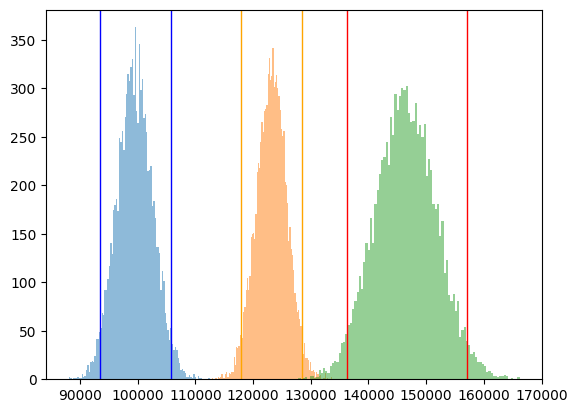

In [138]:
fig, ax = plt.subplots()
bin1 = np.linspace(np.min(bootstrap_samples_b), np.max(bootstrap_samples_b),100)

ax.hist(bootstrap_samples_b, bin1, histtype='stepfilled',alpha=0.5)
ax.axvline(np.percentile(bootstrap_samples_b,2.5), color = 'blue', linewidth = 1)
ax.axvline(np.percentile(bootstrap_samples_b,97.5), color = 'blue', linewidth = 1)

bin2 = np.linspace(np.min(bootstrap_samples_m), np.max(bootstrap_samples_m),100)

ax.hist(bootstrap_samples_m, bin2, histtype='stepfilled',alpha=0.5)
ax.axvline(np.percentile(bootstrap_samples_m,2.5), color = 'orange', linewidth = 1)
ax.axvline(np.percentile(bootstrap_samples_m,97.5), color = 'orange', linewidth = 1)

bin3 = np.linspace(np.min(bootstrap_samples_d), np.max(bootstrap_samples_d),100)

ax.hist(bootstrap_samples_d, bin3, histtype='stepfilled',alpha=0.5)
ax.axvline(np.percentile(bootstrap_samples_d,2.5), color = 'red', linewidth = 1)
ax.axvline(np.percentile(bootstrap_samples_d,97.5), color = 'red', linewidth = 1)

pyplot.show()

Find the mean differences between Bachelor’s degree and Master’s degree, Master’s degree and Doctoral degree.

In [139]:
sal_dif_m_b = [bachelor - master for master, bachelor in zip(bootstrap_samples_m, bootstrap_samples_b)]
sal_dif_m_d = [master - doctoral for master, doctoral in zip(bootstrap_samples_m, bootstrap_samples_d)]

Count t-value and p-value by phormula for Bachelor’s degree and Master’s degree

In [140]:
sal_dif_m_b_standard = sal_dif_m_b / np.std(sal_dif_m_b)

sal_dif_m_b_mean = np.mean(sal_dif_m_b_standard)
if(sal_dif_m_b_mean >= 0):
  sal_dif_m_b_pval = sum(sal_dif_m_b_standard < 0)/len(sal_dif_m_b_standard)
else:
  sal_dif_m_b_pval = 1-2*((sum(sal_dif_m_b_standard < 0)/len(sal_dif_m_b_standard))-0.5)

# We have tc_first, pc_first to compare with our values
# Compare the results
print("Results using stats.ttest_ind:")
print("t-statistic (SciPy):", tc_first)
print("p-value (SciPy):", pc_first)

print("\nManual calculation results:")
print("t-statistic (Manual):", sal_dif_m_b_mean)
print("p-value (Manual):", sal_dif_m_b_pval)

Results using stats.ttest_ind:
t-statistic (SciPy): -5.577056285399581
p-value (SciPy): 2.866198130514462e-08

Manual calculation results:
t-statistic (Manual): -5.7517184359934
p-value (Manual): 0.0


Building the plot for the mean differences between Bachelor’s degree and Master’s degree

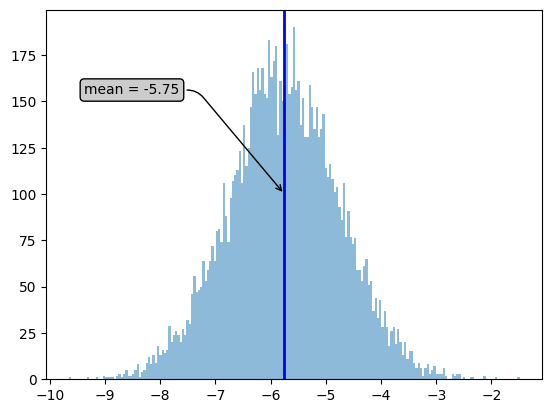

In [141]:
fig, ax = plt.subplots()
bins = np.linspace(np.min(sal_dif_m_b_standard), np.max(sal_dif_m_b_standard), 200)

ax.hist(sal_dif_m_b_standard, bins, alpha = 0.5, histtype = 'stepfilled')

ax.axvline(sal_dif_m_b_mean, color = 'blue', linewidth = 2)
bbox = dict(boxstyle = "round", fc = "0.8")
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 130,\
    rad = 10")
offset = 72
ax.annotate('mean = %.2f'%(np.mean(sal_dif_m_b_standard)),
            (np.mean(sal_dif_m_b_standard), 100), xytext = (-2 * offset, offset),
            textcoords = 'offset points',
            bbox = bbox, arrowprops = arrowprops)
pyplot.show()

Normalize the data & building plot

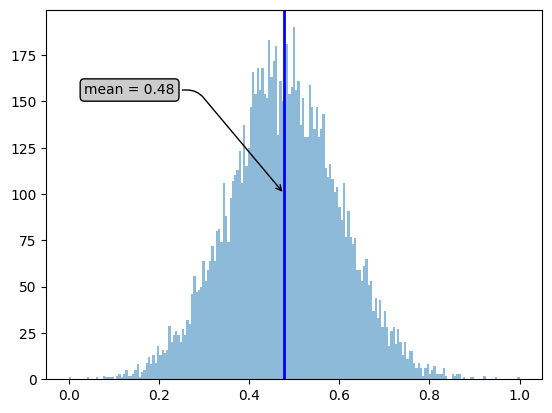

In [142]:
min_value = min(sal_dif_m_b)
max_value = max(sal_dif_m_b)

# Normalize the list to the [0, 1] range
normalized_data_m_b = [(x - min_value) / (max_value - min_value) for x in sal_dif_m_b]

fig, ax = plt.subplots()
bins = np.linspace(np.min(normalized_data_m_b), np.max(normalized_data_m_b), 200)

ax.hist(normalized_data_m_b, bins, alpha = 0.5, histtype = 'stepfilled')

ax.axvline(np.mean(normalized_data_m_b), color = 'blue', linewidth = 2)
bbox = dict(boxstyle = "round", fc = "0.8")
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 130,\
    rad = 10")
offset = 72
ax.annotate('mean = %.2f'%(np.mean(normalized_data_m_b)),
            (np.mean(normalized_data_m_b), 100), xytext = (-2 * offset, offset),
            textcoords = 'offset points',
            bbox = bbox, arrowprops = arrowprops)
pyplot.show()

Count t-value and p-value by phormula for Master’s degree and Doctoral degree & Building the plot for the mean differences between Bachelor’s degree and Master’s degree

Results using stats.ttest_ind:
t-statistic (SciPy): -4.250225331671596
p-value (SciPy): 2.2794745100267935e-05

Manual calculation results:
t-statistic (Manual): -3.883936905986219
p-value (Manual): 0.0


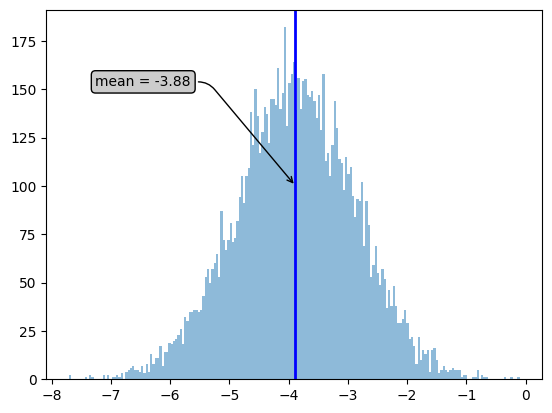

In [143]:
sal_dif_m_d_standard = sal_dif_m_d / np.std(sal_dif_m_d)

sal_dif_m_d_mean = np.mean(sal_dif_m_d_standard)
if(sal_dif_m_d_mean >= 0):
  sal_dif_m_d_pval = sum(sal_dif_m_d_standard < 0)/len(sal_dif_m_d_standard)
else:
  sal_dif_m_d_pval = 1-2*((sum(sal_dif_m_d_standard < 0)/len(sal_dif_m_d_standard))-0.5)

print("Results using stats.ttest_ind:")
print("t-statistic (SciPy):", tc_second)
print("p-value (SciPy):", pc_second)

print("\nManual calculation results:")
print("t-statistic (Manual):", sal_dif_m_d_mean)
print("p-value (Manual):", sal_dif_m_d_pval)

fig, ax = plt.subplots()
bins = np.linspace(np.min(sal_dif_m_d_standard), np.max(sal_dif_m_d_standard), 200)

ax.hist(sal_dif_m_d_standard, bins, alpha = 0.5, histtype = 'stepfilled')

ax.axvline(sal_dif_m_d_mean, color = 'blue', linewidth = 2)
bbox = dict(boxstyle = "round", fc = "0.8")
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 130,\
    rad = 10")
offset = 72
ax.annotate('mean = %.2f'%(np.mean(sal_dif_m_d_standard)),
            (np.mean(sal_dif_m_d_standard), 100), xytext = (-2 * offset, offset),
            textcoords = 'offset points',
            bbox = bbox, arrowprops = arrowprops)
pyplot.show()

Normalize the data & building plot

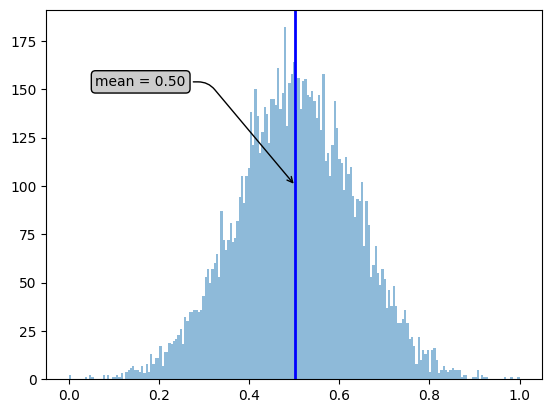

In [144]:
min_value = min(sal_dif_m_d)
max_value = max(sal_dif_m_d)

# Normalize the list to the [0, 1] range
normalized_data_m_d = [(x - min_value) / (max_value - min_value) for x in sal_dif_m_d]

fig, ax = plt.subplots()
bins = np.linspace(np.min(normalized_data_m_d), np.max(normalized_data_m_d), 200)

ax.hist(normalized_data_m_d, bins, alpha = 0.5, histtype = 'stepfilled')

ax.axvline(np.mean(normalized_data_m_d), color = 'blue', linewidth = 2)
bbox = dict(boxstyle = "round", fc = "0.8")
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 130,\
    rad = 10")
offset = 72
ax.annotate('mean = %.2f'%(np.mean(normalized_data_m_d)),
            (np.mean(normalized_data_m_d), 100), xytext = (-2 * offset, offset),
            textcoords = 'offset points',
            bbox = bbox, arrowprops = arrowprops)
pyplot.show()

## Visualizations


Some plots for Bachelor’s degree and Master’s degree salaries

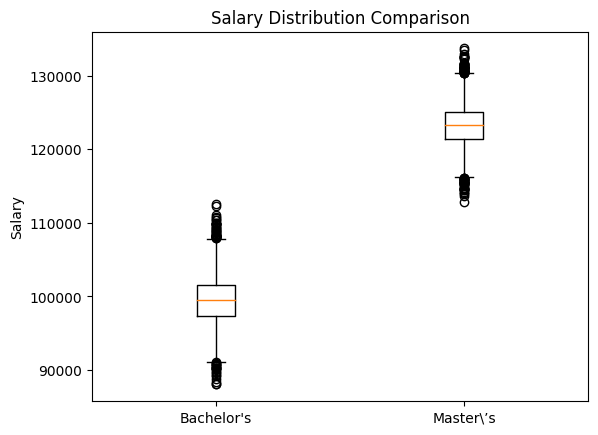

In [145]:
plt.boxplot([bootstrap_samples_b, bootstrap_samples_m], labels=['Bachelor\'s', 'Master\’s'])
plt.ylabel('Salary')
plt.title('Salary Distribution Comparison')
plt.show()

<ipython-input-146-98f0239d9c7a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(bootstrap_samples_b, label='Bachelor\'s', shade=True)
<ipython-input-146-98f0239d9c7a>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(bootstrap_samples_m, label='Master\'s', shade=True)


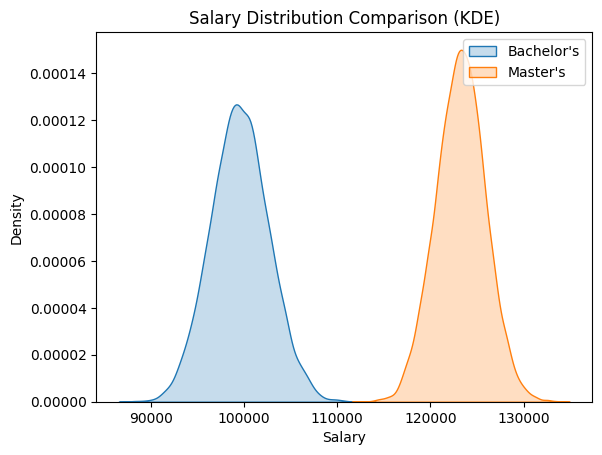

In [146]:
import seaborn as sns

sns.kdeplot(bootstrap_samples_b, label='Bachelor\'s', shade=True)
sns.kdeplot(bootstrap_samples_m, label='Master\'s', shade=True)
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Salary Distribution Comparison (KDE)')
plt.legend()
plt.show()

Some plots for Master’s degree and Doctoral degree salaries

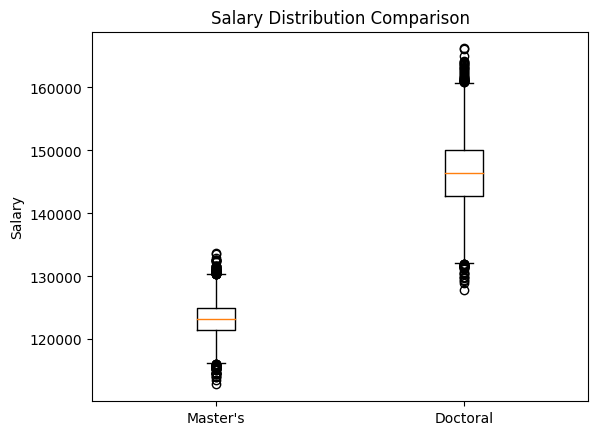

In [147]:
plt.boxplot([bootstrap_samples_m, bootstrap_samples_d], labels=['Master\'s', 'Doctoral'])
plt.ylabel('Salary')
plt.title('Salary Distribution Comparison')
plt.show()

<ipython-input-148-78318bfaab27>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(bootstrap_samples_m, label='Master\'s', shade=True)
<ipython-input-148-78318bfaab27>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(bootstrap_samples_d, label='Doctoral', shade=True)


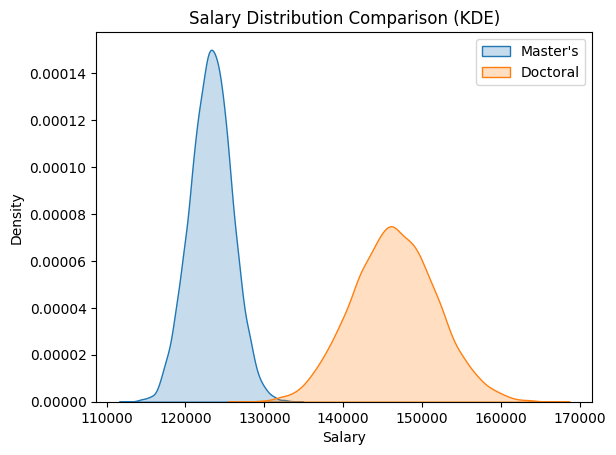

In [148]:
import seaborn as sns

sns.kdeplot(bootstrap_samples_m, label='Master\'s', shade=True)
sns.kdeplot(bootstrap_samples_d, label='Doctoral', shade=True)
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Salary Distribution Comparison (KDE)')
plt.legend()
plt.show()